In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
X_real = pd.read_json("../benchmark/data/real_data.json")
X_syn = pd.read_json("../data/synthesized/final_datasets/PAR.json")
col = "market_value"
color_real = "blue"
color_syn = "orange"

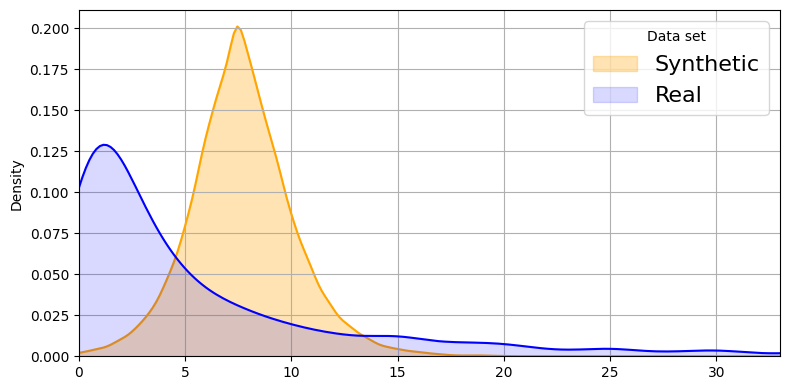

In [4]:

real_values = X_real[col]
syn_values = X_syn[col]

combined_vals = pd.concat([real_values, syn_values])
cutoff = combined_vals.quantile(0.975)

# sampled at 200 points between 0 and cutoff
x_grid = np.linspace(0, cutoff, 200)
real_kde = gaussian_kde(real_values)
syn_kde = gaussian_kde(syn_values)
y_real = real_kde(x_grid)
y_syn = syn_kde(x_grid)

fig, ax = plt.subplots(figsize=(8, 4))

# fill area under curve to see differences easier
ax.fill_between(x_grid, y_syn, alpha=0.3, color=color_syn, label='Synthetic', zorder=1)
ax.fill_between(x_grid, y_real, alpha=0.15, color=color_real, label='Real', zorder=2)
ax.plot(x_grid, y_syn, color=color_syn, zorder=1)
ax.plot(x_grid, y_real, color=color_real, zorder=2)

# get proportion of rows that are above cutoff for each dataset
over_real = (real_values > cutoff).mean()
over_syn = (syn_values > cutoff).mean()
# ax.text(0.99, 0.95, f"Real >97.5%: {over_real:.1%}\nSynth >97.5%: {over_syn:.1%}", transform=ax.transAxes,
#         ha='right', va='top', fontsize=9,
#         bbox=dict(boxstyle='round,pad=0.3', alpha=0.2))

# ax.set_xlabel(col, fontsize=20)
ax.set_ylabel('Density')
ax.legend(title="Data set", fontsize=16)
ax.grid(True)
ax.set_xlim(0, cutoff)
ax.set_ylim(bottom=0)
plt.tight_layout()
plt.savefig("./saved/distribution_example.png")
plt.show()